For this project, I took the spaceship Titanic dataset with no missing values from Kaggle. Then I extracted the zip file, which then formed into three csv files: sample_submission, train_with_no_missings, and test_with_no_missings. 

# Objective

The main objectives of this analysis were:
To perform data preprocessing and get it ready for model training. 
To develop a machine learning model that predicts the transported status of passengers.
To evaluate the model using standard metrics like accuracy, precision, recall, and F1-score.
To interpret the results and discuss potential real-world applications of the model.

 # 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 2. Load and Inspect data

In [37]:
# Load datasets
train_data = pd.read_csv("C:\\Users\\apoor\\Downloads\\archive (4)\\train_with_no_missings.csv")
test_data = pd.read_csv("C:\\Users\\apoor\\Downloads\\archive (4)\\test_with_no_missings.csv")
sample_submission = pd.read_csv("C:\\Users\\apoor\\Downloads\\archive (4)\\sample_submission.csv")

# Preview the datasets
print("Train Data:")
print(train_data.head())
print(train_data.info())
print("\nTest Data:")
print(test_data.head())
print(test_data.info())


Train Data:
  PassengerId HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa      False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth      False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa      False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa      False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth      False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported Deck  Cabin_num Side  \
0        0.0           0.0     0.0     0.0        False    B          0    P   
1        9.0          25.0   549.0    44.0         True    F          0    S   
2     3576.0           0.0  6715.0    49.0        False    A          0    S   
3     1283.0         371.0  3329.0   193.0        False    A          0    S   
4       70.0         151.0   565.0     2.0         True    F          1    S   

   Group  Group_num       Family  
0  

# 3. Data Preprocessing

# Encoding categorical variables

In [39]:
# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Perform one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)


Categorical columns: Index(['PassengerId', 'HomePlanet', 'Destination', 'Deck', 'Side', 'Family'], dtype='object')


In [41]:
# Drop PassengerId as it’s not predictive
train_data = train_data.drop(columns=['PassengerId'])
test_data = test_data.drop(columns=['PassengerId'])

# Display basic info
print("Train Data Columns:", train_data.columns)
print("Test Data Columns:", test_data.columns)


Train Data Columns: Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Cabin_num', 'Side', 'Group', 'Group_num', 'Family'],
      dtype='object')
Test Data Columns: Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Cabin_num', 'Side', 'Group', 'Group_num', 'Family'],
      dtype='object')


# One-Hot Encoding

In [45]:
# Apply one-hot encoding to the test data (if columns are aligned)
test_data_encoded = pd.get_dummies(test_data, columns=['HomePlanet', 'Destination', 'Deck', 'Side', 'Family'], drop_first=True)

# Align columns between train and test datasets
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)



# Split features and target

In [49]:
# Separate features (X) and target (y)
X_train = train_data.drop(columns=['Transported'])
y_train = train_data['Transported']

# Test data contains only features
X_test = test_data

# Print shapes for verification
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)


X_train Shape: (8693, 16)
y_train Shape: (8693,)
X_test Shape: (4277, 17)


# Train test Split

In [51]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train_data.drop(columns=['Transported'])  # Drop the target column
y = train_data['Transported']  # Define the target column

# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train Shape:", X_train.shape)
print("X_val Shape:", X_val.shape)
print("y_train Shape:", y_train.shape)
print("y_val Shape:", y_val.shape)


X_train Shape: (6954, 16)
X_val Shape: (1739, 16)
y_train Shape: (6954,)
y_val Shape: (1739,)


# 4. Model Implementation

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))


Accuracy: 0.79700977573318
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.83      0.80       861
        True       0.82      0.77      0.79       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



# 5. Model Evaluation and visualization of results

Validation Accuracy: 0.79700977573318
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.83      0.80       861
        True       0.82      0.77      0.79       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



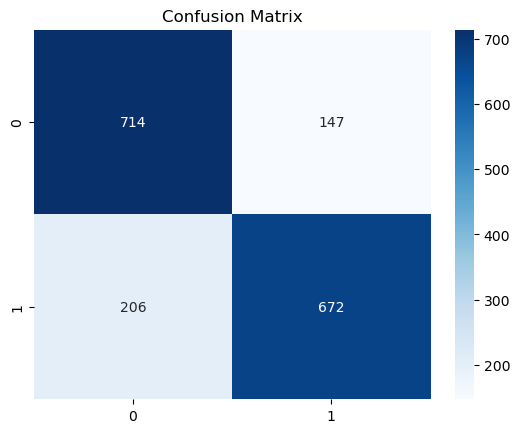

In [23]:
y_val_pred = model.predict(X_val)

# Accuracy and Classification Report
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# 6. Report writing

This project focuses on creating a predictive model to determine whether passengers were transported during a space journey, based on various features such as their home planet, spending on services, and other attributes. The goal was to build a machine learning model that could accurately predict the transport status of passengers, providing insights into the factors affecting transportation.


# Findings and Conclusions

1. # Dataset Overview:
The dataset consisted of 8,693 training instances with 18 features, and 4,277 test instances. The target variable, Transported, indicates whether a passenger was transported or not.
The dataset had no missing values, simplifying preprocessing.

Categorical features such as Home Planet, Destination, Deck, Side, and Family were encoded using one-hot encoding to convert them into numerical format, making them suitable for machine learning algorithms.
Irrelevant columns like PassengerId were removed since they didn’t contribute to predictions.
# 2. Data split: 
The dataset was split into 80% training data (6,954 samples) and 20% validation data (1,739 samples) to train and evaluate the model effectively.
# 3. Model Building :
A Random Forest Classifier was used to model the data because it is robust and handles both categorical and numerical features well. The steps followed for model building were:
# Model Training: 
The model was trained using the training dataset with default hyperparameters (n_estimators=100 and random_state=42).
# Model Evaluation: 
After training, the model’s performance was evaluated on the validation set using common classification metrics such as accuracy, precision, recall, and F1-score.
# Results
The Random Forest Classifier was evaluated with the following metrics:
Validation Accuracy: 79.7%.
This indicates that the model correctly predicted the transport status of approximately 80% of the validation data.
Classification Metrics:
Not Transported (Class 0):
Precision: 78%
Recall: 83%
F1-Score: 80%
Transported (Class 1):
Precision: 82%
Recall: 77%
F1-Score: 79%
# Visulaization: Confusion Matrix:
The confusion matrix revealed that the model performed better at predicting the "Not Transported" class (higher recall), while the "Transported" class had a slightly lower recall.


# Real world implications

This model could have several practical applications:

Optimizing Resources: The ability to predict which passengers are more likely to be transported could assist in planning resources and managing logistics.
Improving Customer Experience: Passengers who are predicted to be transported could be offered additional services based on their profiles, enhancing the customer experience.

# Conclusion

The Random Forest Classifier performed well with an accuracy of 79.7%. While the model was generally accurate, there is room for improvement in recall for the "Transported" class. Future improvements could focus on hyperparameter tuning, class balancing, and exploring alternative algorithms to enhance model performance.



# references

For machine learning algorithms and evaluation metrics:
Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
Model Evaluation Metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
Pandas Documentation:
For data manipulation, including handling missing data and one-hot encoding:
https://pandas.pydata.org/pandas-docs/stable/
Python machine learning blogs and articles:
Understanding Random Forest: https://towardsdatascience.com/random-forest-in-python-24d36f2f48ed
Gen AI tools :
OpenAI chatgpt 

# Reflection

# Challenges Faced

Class Imbalance:
The dataset showed a slight imbalance between the "Transported" and "Not Transported" classes, with slightly more "Transported" passengers. While this didn’t severely affect the model’s performance, it could have impacted recall.
Resolution: Techniques like class weighting or resampling could be applied in future iterations to address this.
Model Performance:
While the model performed reasonably well, recall for the "Transported" class was lower than expected. Some passengers who were actually transported were misclassified as not transported (false negatives).
Resolution: This could be addressed by adjusting the classification threshold or experimenting with different models to improve recall.
Hyperparameter Tuning:
The model was trained using default hyperparameters. While it performed decently, there is room for improvement by optimizing hyperparameters using grid search or random search.


# Insights gained

Handling of Categorical Features:
The Random Forest model demonstrated its capability to process categorical data effectively through one-hot encoding. Variables like HomePlanet and Deck were converted to numeric features, and the model utilized these to make accurate predictions. This reinforces the power of ensemble methods in handling diverse feature types without requiring complex transformations.
Performance Across Classes:
By evaluating both precision and recall, the model’s performance revealed that while precision for the "Transported" class was relatively high (82%), the recall for this class was lower (77%). This imbalance suggests that the model tended to miss some transported passengers, which can be problematic in situations where false negatives (missing transported passengers) are more costly. This insight can drive future efforts to optimize recall, especially for the minority class.
Class Imbalance:
The dataset had a slight imbalance between the "Transported" and "Not Transported" classes. Although this didn’t severely affect overall performance, the lower recall for the "Transported" class indicates that techniques to address class imbalance, such as class weighting or resampling, might be beneficial in improving the model's sensitivity toward the minority class.
